In [1]:
# Base

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot settings

%matplotlib inline
sns.set_context('talk')
sns.set_palette('gray')
sns.set_style('ticks', {'grid.color' : '0.9'})

In [3]:
# Algorithms

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

In [4]:
# Model selection

from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [26]:
x_train = np.asarray(pd.read_csv('processed/x_train.csv'))
y_train = np.asarray(pd.read_csv('processed/y_train.csv')).ravel()

Now, our training data is transformed and scaled into all numeric features. It is time to apply models in succession. We are trying to get a sense of accuracy of all the models and shortlist 2-3 models at this stage

In [28]:
sgd_classif = SGDClassifier(max_iter=1000, tol=1e-3)

In [29]:
sgd_score = cross_val_score(sgd_classif, x_train, y_train,
                            scoring = 'accuracy',
                            cv = 10)

In [31]:
rf_classif = RandomForestClassifier(n_estimators = 100, 
                                    random_state=20130810)

In [32]:
rf_score = cross_val_score(rf_classif, x_train, y_train,
                           scoring = 'accuracy', 
                           cv = 10)

In [33]:
logit_classif = LogisticRegression()

In [34]:
logit_score = cross_val_score(logit_classif, x_train, y_train,
                              scoring = 'accuracy',
                              cv = 10)

In [35]:
knn5_classif = KNeighborsClassifier(n_neighbors = 5)

In [36]:
knn5_score = cross_val_score(knn5_classif, x_train, y_train,
                             scoring = 'accuracy',
                             cv = 10)

In [37]:
nb_classif = GaussianNB()

In [38]:
nb_score = cross_val_score(nb_classif, x_train, y_train,
                           scoring = 'accuracy',
                           cv = 10)

In [39]:
perceptron_classif = Perceptron()

In [40]:
perceptron_score = cross_val_score(perceptron_classif, x_train, y_train,
                                   scoring = 'accuracy',
                                   cv = 10)

C:\Users\kimmcodxb\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\kimmcodxb\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\kimmcodxb\Anaconda3\lib\site-packages\s

In [41]:
linearsvc_classif = LinearSVC()

In [42]:
linearSVC_score = cross_val_score(linearsvc_classif, x_train, y_train, 
                                  scoring = 'accuracy', 
                                  cv = 10)

In [43]:
svc_classif = SVC()

In [44]:
svc_score = cross_val_score(svc_classif, x_train, y_train,
                            scoring = 'accuracy',
                            cv = 10)

In [45]:
dtree_classif = DecisionTreeClassifier()

In [46]:
dtree_score = cross_val_score(dtree_classif, x_train, y_train,
                              scoring = 'accuracy',
                              cv = 10)

In [47]:
results = pd.DataFrame({ 'Model' : ['Decision Tree', 'SVC', 'Linear SVC', 'Perceptron', 'Naive Bayes', \
                                    '5NN', 'Logistic Regression', 'Random Forests', 'SGD'] ,
                         'Accuracy_mean' : [dtree_score.mean(), svc_score.mean(), linearSVC_score.mean(), \
                                            perceptron_score.mean(), nb_score.mean(), knn5_score.mean(), \
                                            logit_score.mean(), rf_score.mean(), sgd_score.mean()],
                         'Accuracy_sd' : [dtree_score.std(), svc_score.std(), linearSVC_score.std(), \
                                            perceptron_score.std(), nb_score.std(), knn5_score.std(), \
                                            logit_score.std(), rf_score.std(), sgd_score.std()]})

In [48]:
scores = np.concatenate((dtree_score, svc_score, linearSVC_score, perceptron_score, nb_score, knn5_score,\
                         logit_score, rf_score, sgd_score), axis = 0)

In [49]:
algorithms = [np.repeat(algo, 10) for algo in ['Decision Tree', 'SVC', 'Linear SVC', 'Perceptron', 'Naive Bayes', \
                                               '5NN', 'Logistic Regression', 'Random Forests', 'SGD']]

In [50]:
algorithms = np.array(algorithms).flatten()

In [51]:
results_df = pd.DataFrame({ 'Model' : algorithms , 'Accuracy' : scores })

In [52]:
results_df.head()

,Accuracy,Model
0,0.688889,Decision Tree
1,0.777778,Decision Tree
2,0.741573,Decision Tree
3,0.775281,Decision Tree
4,0.820225,Decision Tree


C:\Users\kimmcodxb\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


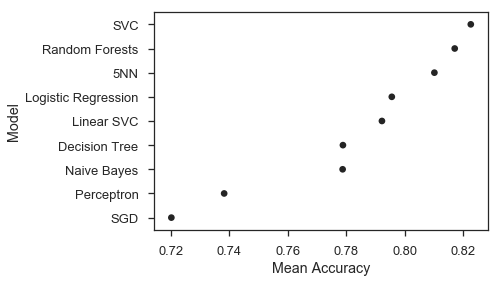

In [53]:
sns.pointplot(y = 'Model', x = 'Accuracy_mean',
              data = results.sort_values(by = 'Accuracy_mean', ascending = False),
              scale = 0.5,
              join = False)
plt.xlabel("Mean Accuracy");

C:\Users\kimmcodxb\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


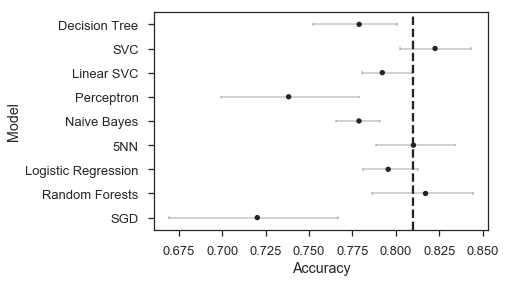

In [54]:
sns.pointplot(y = 'Model', x = 'Accuracy', 
              data = results_df,
              scale = 0.4,              
              errwidth = 0.4,
              capsize = 0.1,
              join = False)
plt.axvline(x = 0.81, linestyle = '--')

Looks like Random Forests and SVC are the best bet even without tuning. So, lets tune the forests.

In [55]:
pgrid = {'criterion' : ['gini', 'entropy'],
         'min_samples_leaf' : [1, 10, 20, 50],
         'min_samples_split' : [2, 10, 20, 30],
         'n_estimators' : [100, 500, 1000]}

In [56]:
rf_classif = RandomForestClassifier(n_estimators = 100,
                                    max_features = 'auto',
                                    oob_score = True,
                                    random_state = 20130810,
                                    n_jobs = -1)

In [57]:
rf_cv = RandomizedSearchCV(estimator=rf_classif,
                           param_distributions = pgrid,
                           n_iter = 25,
                           n_jobs = -1)

In [58]:
%time
rf_cv.fit(x_train, y_train)

Wall time: 0 ns


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=20130810, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 10, 20, 50], 'min_samples_split': [2, 10, 20, 30], 'n_estimators': [100, 500, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [59]:
rf_cv.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}